In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 142M/149M [00:01<00:00, 101MB/s]
100% 149M/149M [00:01<00:00, 122MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  classpaths = []

  for lable in os.listdir(path):
    lable_path = os.path.join(path ,lable)

    if os.path.isdir(lable_path):

      for image in os.listdir(lable_path):
        image_path = os.path.join(lable_path , image)

        classes.append(lable)
        classpaths.append(image_path)

  df = pd.DataFrame({
      'Class Path' : classpaths,
      'Class' : classes
  })
  return df


In [ ]:
tr_df = get_class_paths('/content/Training')

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_0358.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0781.jpg,meningioma
2,/content/Training/meningioma/Tr-me_1261.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0195.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0495.jpg,meningioma
...,...,...
5707,/content/Training/notumor/Tr-no_0019.jpg,notumor
5708,/content/Training/notumor/Tr-no_0635.jpg,notumor
5709,/content/Training/notumor/Tr-no_1126.jpg,notumor
5710,/content/Training/notumor/Tr-no_0897.jpg,notumor


In [ ]:
ts_df = get_class_paths('/content/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0132.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0054.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0182.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0235.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0241.jpg,meningioma
...,...,...
1306,/content/Testing/notumor/Te-no_0082.jpg,notumor
1307,/content/Testing/notumor/Te-no_0346.jpg,notumor
1308,/content/Testing/notumor/Te-no_0039.jpg,notumor
1309,/content/Testing/notumor/Te-no_0270.jpg,notumor


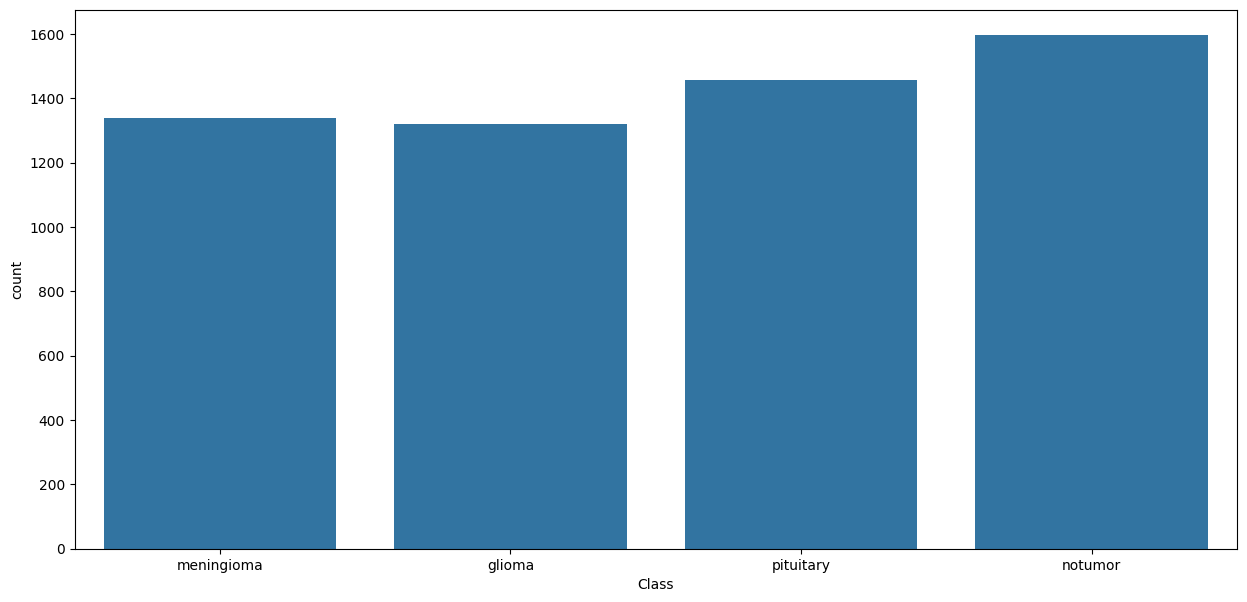

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = tr_df , x = tr_df['Class'])

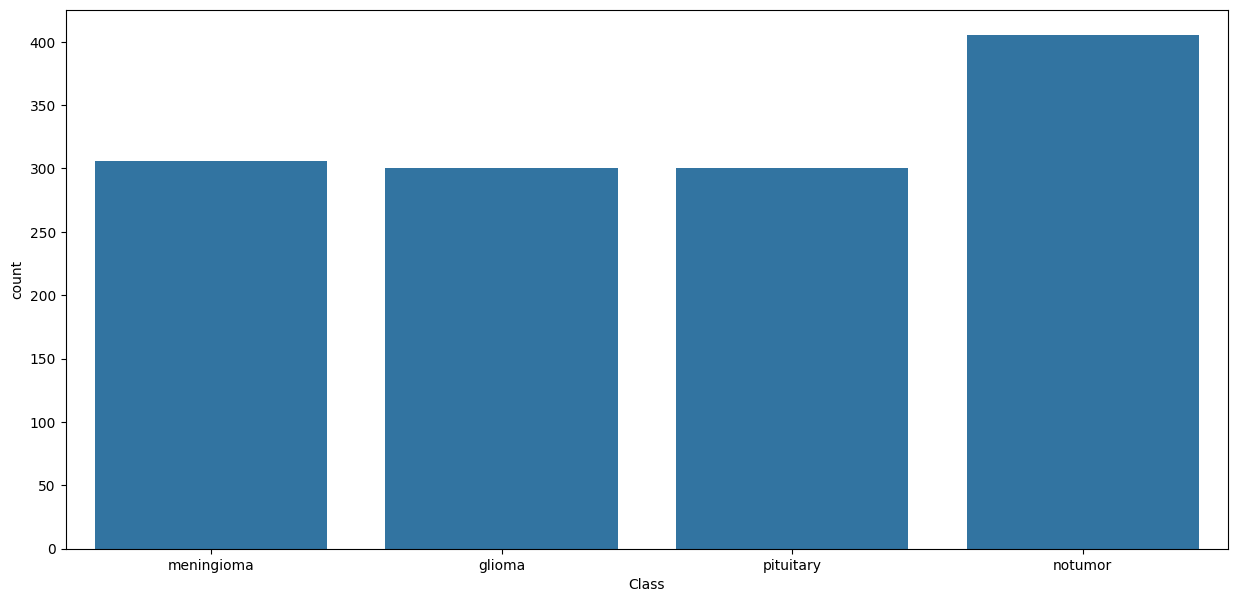

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = ts_df , x = ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision , Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df , ts_df = train_test_split(ts_df , train_size=0.5 , stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
1169,/content/Testing/notumor/Te-no_0098.jpg,notumor
986,/content/Testing/notumor/Te-no_0246.jpg,notumor
448,/content/Testing/glioma/Te-gl_0104.jpg,glioma
404,/content/Testing/glioma/Te-gl_0200.jpg,glioma
209,/content/Testing/meningioma/Te-me_0018.jpg,meningioma
...,...,...
1081,/content/Testing/notumor/Te-no_0293.jpg,notumor
217,/content/Testing/meningioma/Te-me_0023.jpg,meningioma
197,/content/Testing/meningioma/Te-me_0276.jpg,meningioma
661,/content/Testing/pituitary/Te-pi_0250.jpg,pituitary


In [ ]:
ts_df

,Class Path,Class
465,/content/Testing/glioma/Te-gl_0119.jpg,glioma
1094,/content/Testing/notumor/Te-no_0186.jpg,notumor
566,/content/Testing/glioma/Te-gl_0027.jpg,glioma
1204,/content/Testing/notumor/Te-no_0228.jpg,notumor
441,/content/Testing/glioma/Te-gl_0290.jpg,glioma
...,...,...
489,/content/Testing/glioma/Te-glTr_0007.jpg,glioma
515,/content/Testing/glioma/Te-gl_0077.jpg,glioma
433,/content/Testing/glioma/Te-gl_0207.jpg,glioma
514,/content/Testing/glioma/Te-glTr_0008.jpg,glioma


In [ ]:
batch_size = 32
image_size = (299,299)

image_generator = ImageDataGenerator(rescale = 1/255 , brightness_range = (0.8,1.2))
ts_generator = ImageDataGenerator(rescale = 1/255 )

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df , x_col = 'Class Path',
    y_col = 'Class', batch_size = batch_size,
    target_size = image_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df , x_col = 'Class Path',
    y_col = 'Class', batch_size = batch_size,
    target_size = image_size
)

ts_gen = ts_generator.flow_from_dataframe(
    ts_df , x_col = 'Class Path',
    y_col = 'Class', batch_size = 16,
    target_size = image_size, shuffle = False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


<function matplotlib.pyplot.show(close=None, block=None)>

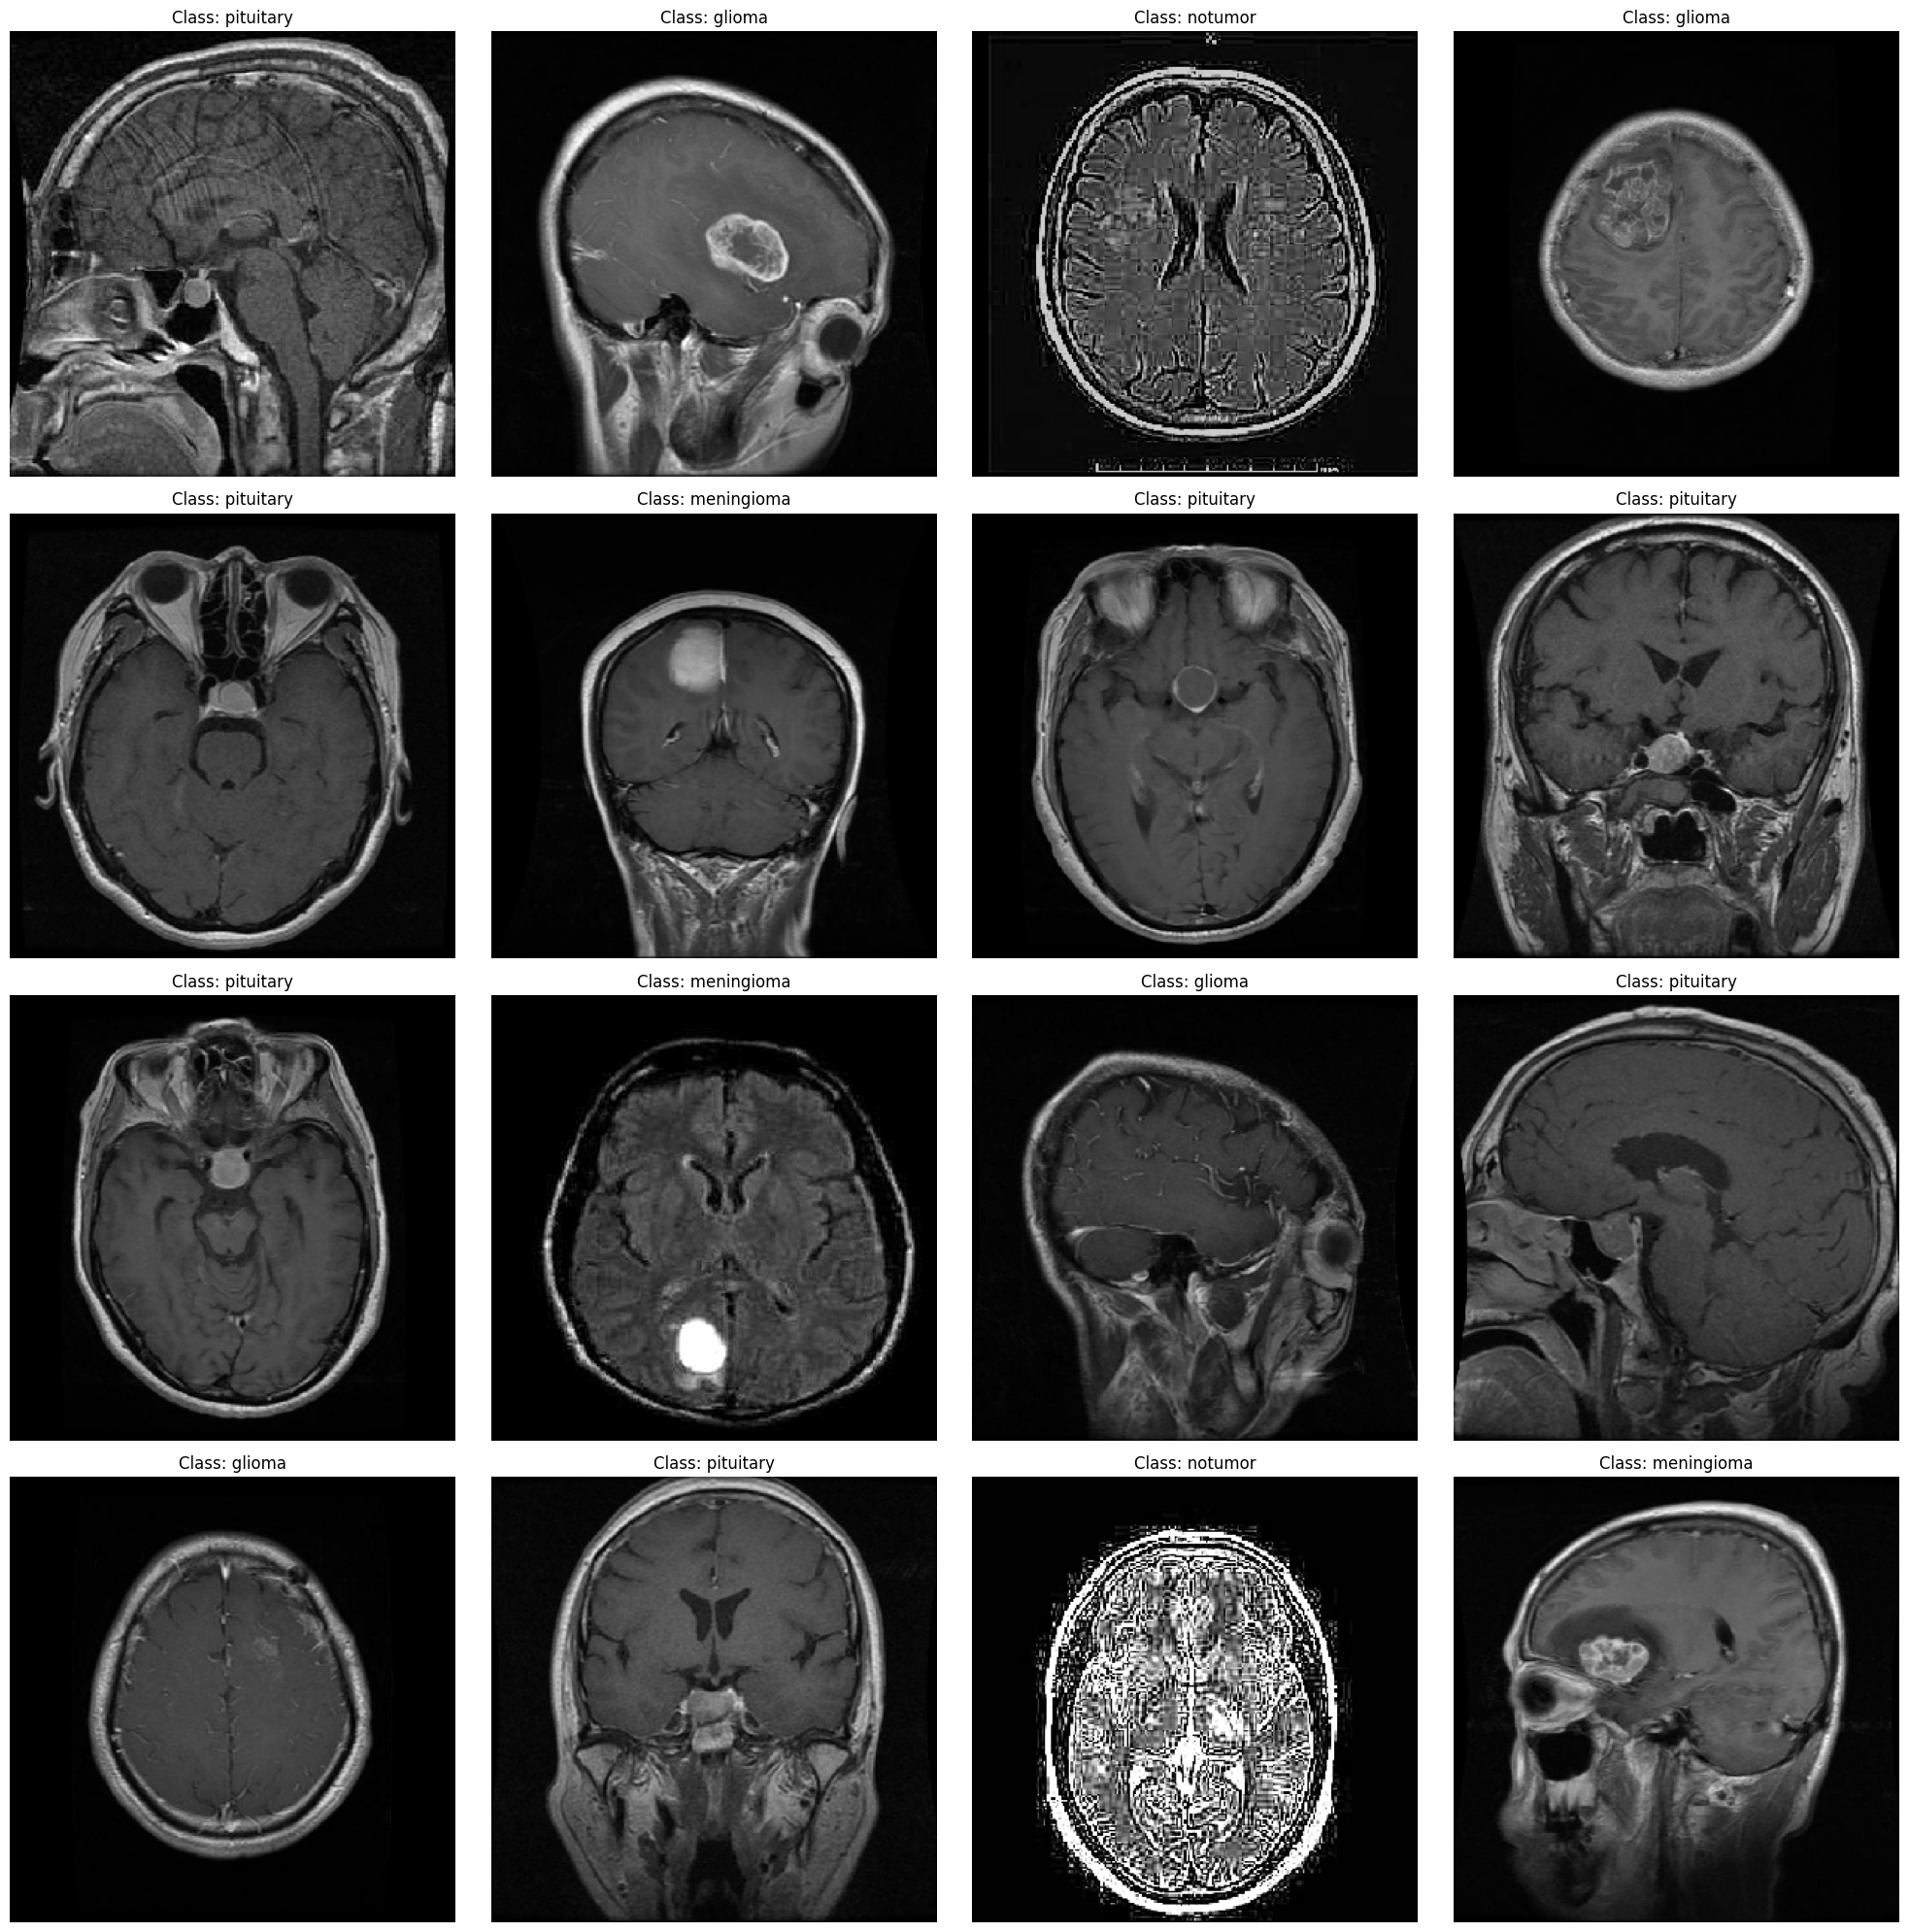

In [ ]:
plt.figure(figsize=(20,20))
for i in range (16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  lable =batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(lable)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis('off')

plt.tight_layout()
plt.show



In [ ]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(
    include_top = False,
    weights = 'imagenet',
    input_shape = img_shape,
    pooling = 'max'
)

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),      # prevents over fitting
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')    #what is softmax and relu?
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate= 0.001),      #What is adamax?
              loss = 'categorical_crossentropy',
              metrics = [
                  'accuracy',
                  Precision(),
                  Recall()
              ])

In [ ]:
hist = model.fit(
    tr_gen ,
    epochs = 4 ,
    validation_data = valid_gen,
   # callbacks=[
    #    early_stopping,
     #   reduce_lr]
        )

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.7249 - loss: 0.7811 - precision: 0.8243 - recall: 0.5988 - val_accuracy: 0.8977 - val_loss: 0.2543 - val_precision: 0.8976 - val_recall: 0.8962
Epoch 2/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 787ms/step - accuracy: 0.9747 - loss: 0.0737 - precision: 0.9781 - recall: 0.9728 - val_accuracy: 0.9344 - val_loss: 0.2299 - val_precision: 0.9358 - val_recall: 0.9344
Epoch 3/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 784ms/step - accuracy: 0.9921 - loss: 0.0306 - precision: 0.9931 - recall: 0.9911 - val_accuracy: 0.9603 - val_loss: 0.1257 - val_precision: 0.9603 - val_recall: 0.9603
Epoch 4/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 784ms/step - accuracy: 0.9942 - loss: 0.0242 - precision: 0.9954 - recall: 0.9941 - val_accuracy: 0.9908 - val_loss: 0.0263 - val_precision: 0.9908 - val_recall: 0.9908


In [ ]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


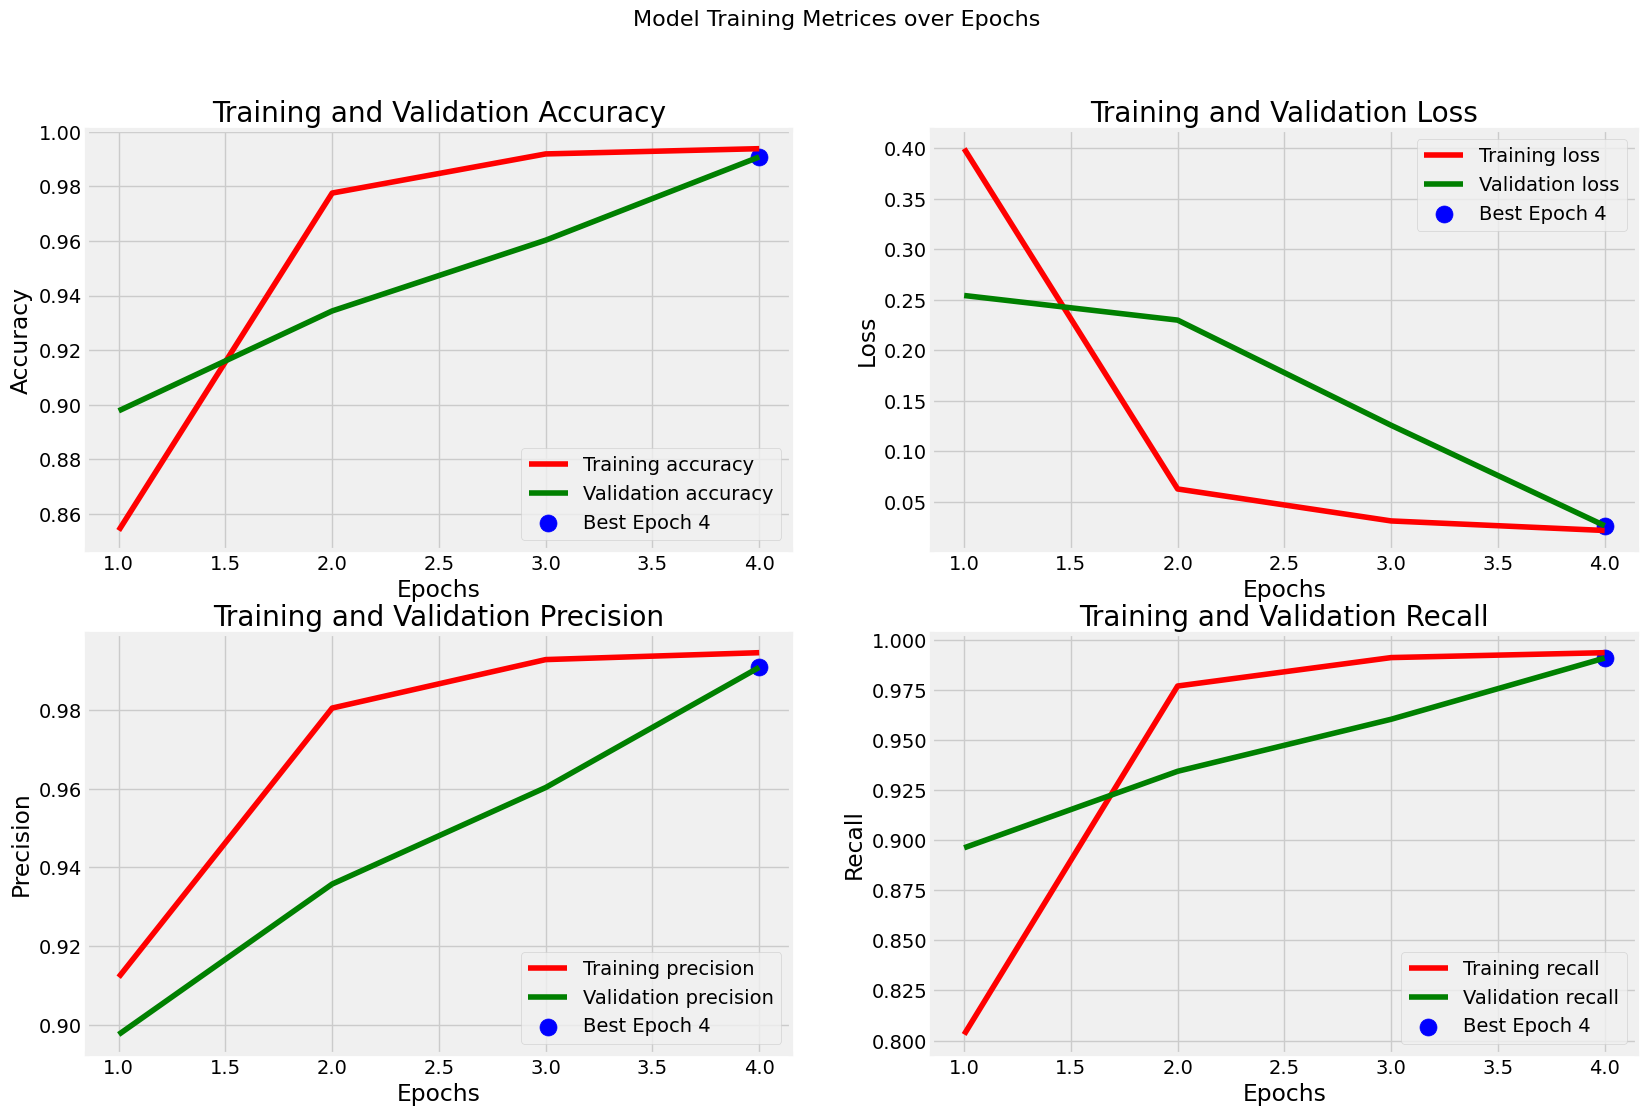

In [ ]:
metrics = ['accuracy' , 'loss' , 'precision' , 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss' :
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx+1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric]) +1 )

  plt.plot(epochs , tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs , val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150 , c = 'b',
             label = f'Best Epoch {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrices over Epochs', fontsize = 16)
plt.show()




In [ ]:
train_score = model.evaluate(tr_gen , verbose = 1)
valid_score = model.evaluate(valid_gen , verbose = 1)
test_score = model.evaluate(ts_gen , verbose = 1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')


179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 246ms/step - accuracy: 0.9996 - loss: 0.0024 - precision: 0.9996 - recall: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9854 - loss: 0.0401 - precision: 0.9854 - recall: 0.9854
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 1.0000 - loss: 1.1988e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9889 - loss: 0.0615 - precision: 0.9889 - recall: 0.9889
Train Accuracy: 99.93%
Train Loss: 0.0033


Validation Accuracy: 98.93%
Validation Loss: 0.0286


Test Accuracy: 99.09%
Test Loss: 0.0340


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step


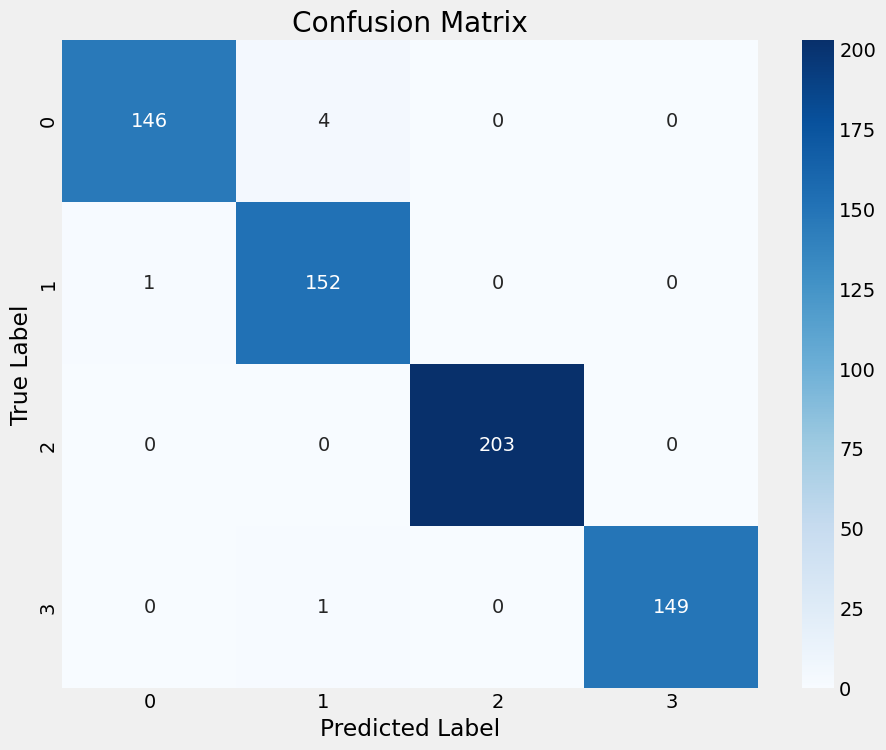

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds , axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituatary'
}

cm = confusion_matrix(ts_gen.classes , y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm , annot = True, fmt = 'd' , cmap = 'Blues', xticklabels = labels , yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:

  #get class labels
  labels = list(class_dict.keys())

  plt.figure(figsize=(6,8))

  #load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array , axis = 0) /255.0

  #get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[ predicted_class_idx]

  #plot original image
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI Image/nPredicted: {predicted_class}')

  #plot prediction probabilites
  plt.subplot(2,1,2)
  bars = plt.barh(labels , probabilities)
  plt.xlabel('Probabilites', fontsize = 15)
  plt.title('Class Probabilities')

  #add probability labels to bar
  ax = plt.gca()
  ax.bar_label(bars , fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f'Predicted Tumour type: {predicted_class}')




1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


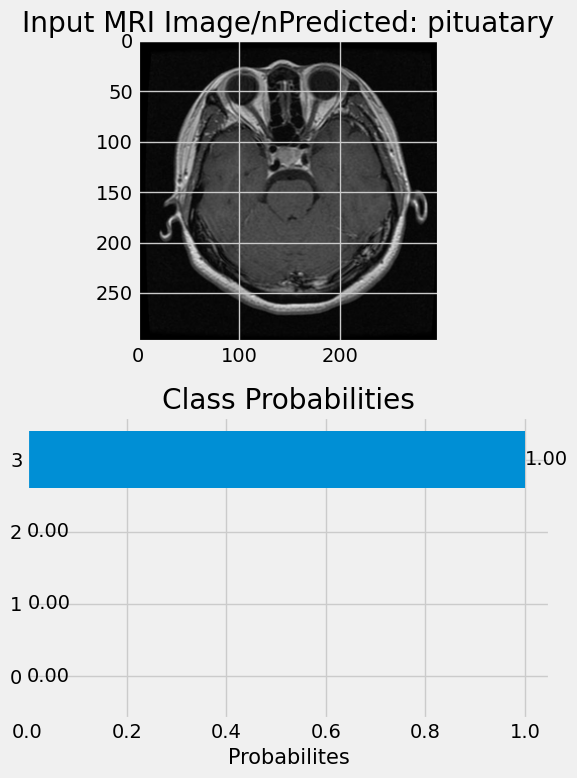

Predicted Tumour type: pituatary


In [ ]:
predict("/content/Testing/pituitary/Te-pi_0011.jpg")

In [ ]:
#Saving Model

model.save_weights('xception_model.weights.h5')

In [ ]:
#CNN model
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization


In [ ]:

batch_size = 16
image_size = (224,224)

image_generator = ImageDataGenerator(rescale = 1/255 , brightness_range = (0.8,1.2))
ts_generator = ImageDataGenerator(rescale = 1/255 )

tr_gen = image_generator.flow_from_dataframe(
    tr_df , x_col = 'Class Path',
    y_col = 'Class', batch_size = batch_size,
    target_size = image_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df , x_col = 'Class Path',
    y_col = 'Class', batch_size = batch_size,
    target_size = image_size
)

ts_gen = ts_generator.flow_from_dataframe(
    ts_df , x_col = 'Class Path',
    y_col = 'Class', batch_size = 16,
    target_size = image_size, shuffle = False
)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
custom_cnn_model = Sequential()

# Convolution layers with Batch Normalization
custom_cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
#custom_cnn_model.add(Dropout(0.25))

custom_cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
#custom_cnn_model.add(Dropout(0.3))

custom_cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_cnn_model.add(Dropout(0.25))

custom_cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_cnn_model.add(Dropout(0.25))

# Flatten the output for fully connected layers
custom_cnn_model.add(Flatten())

# Fully connected layers
custom_cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
custom_cnn_model.add(Dropout(0.35))

# Output layer
custom_cnn_model.add(Dense(4, activation='softmax'))

# Compile the model
custom_cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics =['accuracy', Precision(), Recall()])

# Callbacks for early stopping and learning rate reduction
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history2 = custom_cnn_model.fit(
    tr_gen ,
    epochs = 11 ,
    validation_data = valid_gen,
   # callbacks=[
    #    early_stopping,
     #   reduce_lr]
        )

Epoch 1/11


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 162s 367ms/step - accuracy: 0.6611 - loss: 6.0525 - precision_1: 0.6852 - recall_1: 0.6286 - val_accuracy: 0.3893 - val_loss: 5.7481 - val_precision_1: 0.3899 - val_recall_1: 0.3893
Epoch 2/11
357/357 ━━━━━━━━━━━━━━━━━━━━ 160s 318ms/step - accuracy: 0.8109 - loss: 3.5993 - precision_1: 0.8255 - recall_1: 0.7835 - val_accuracy: 0.8031 - val_loss: 2.8826 - val_precision_1: 0.8252 - val_recall_1: 0.7710
Epoch 3/11
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 318ms/step - accuracy: 0.8499 - loss: 2.5415 - precision_1: 0.8643 - recall_1: 0.8304 - val_accuracy: 0.8580 - val_loss: 1.9537 - val_precision_1: 0.8651 - val_recall_1: 0.8519
Epoch 4/11
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 318ms/step - accuracy: 0.8761 - loss: 1.8110 - precision_1: 0.8874 - recall_1: 0.8628 - val_accuracy: 0.8611 - val_loss: 1.4647 - val_precision_1: 0.8724 - val_recall_1: 0.8458
Epoch 5/11
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 320ms/step - accuracy: 0.8899 - loss: 1.3293 - precision_1: 0.8991 - recall_1:

In [ ]:
print(history2.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


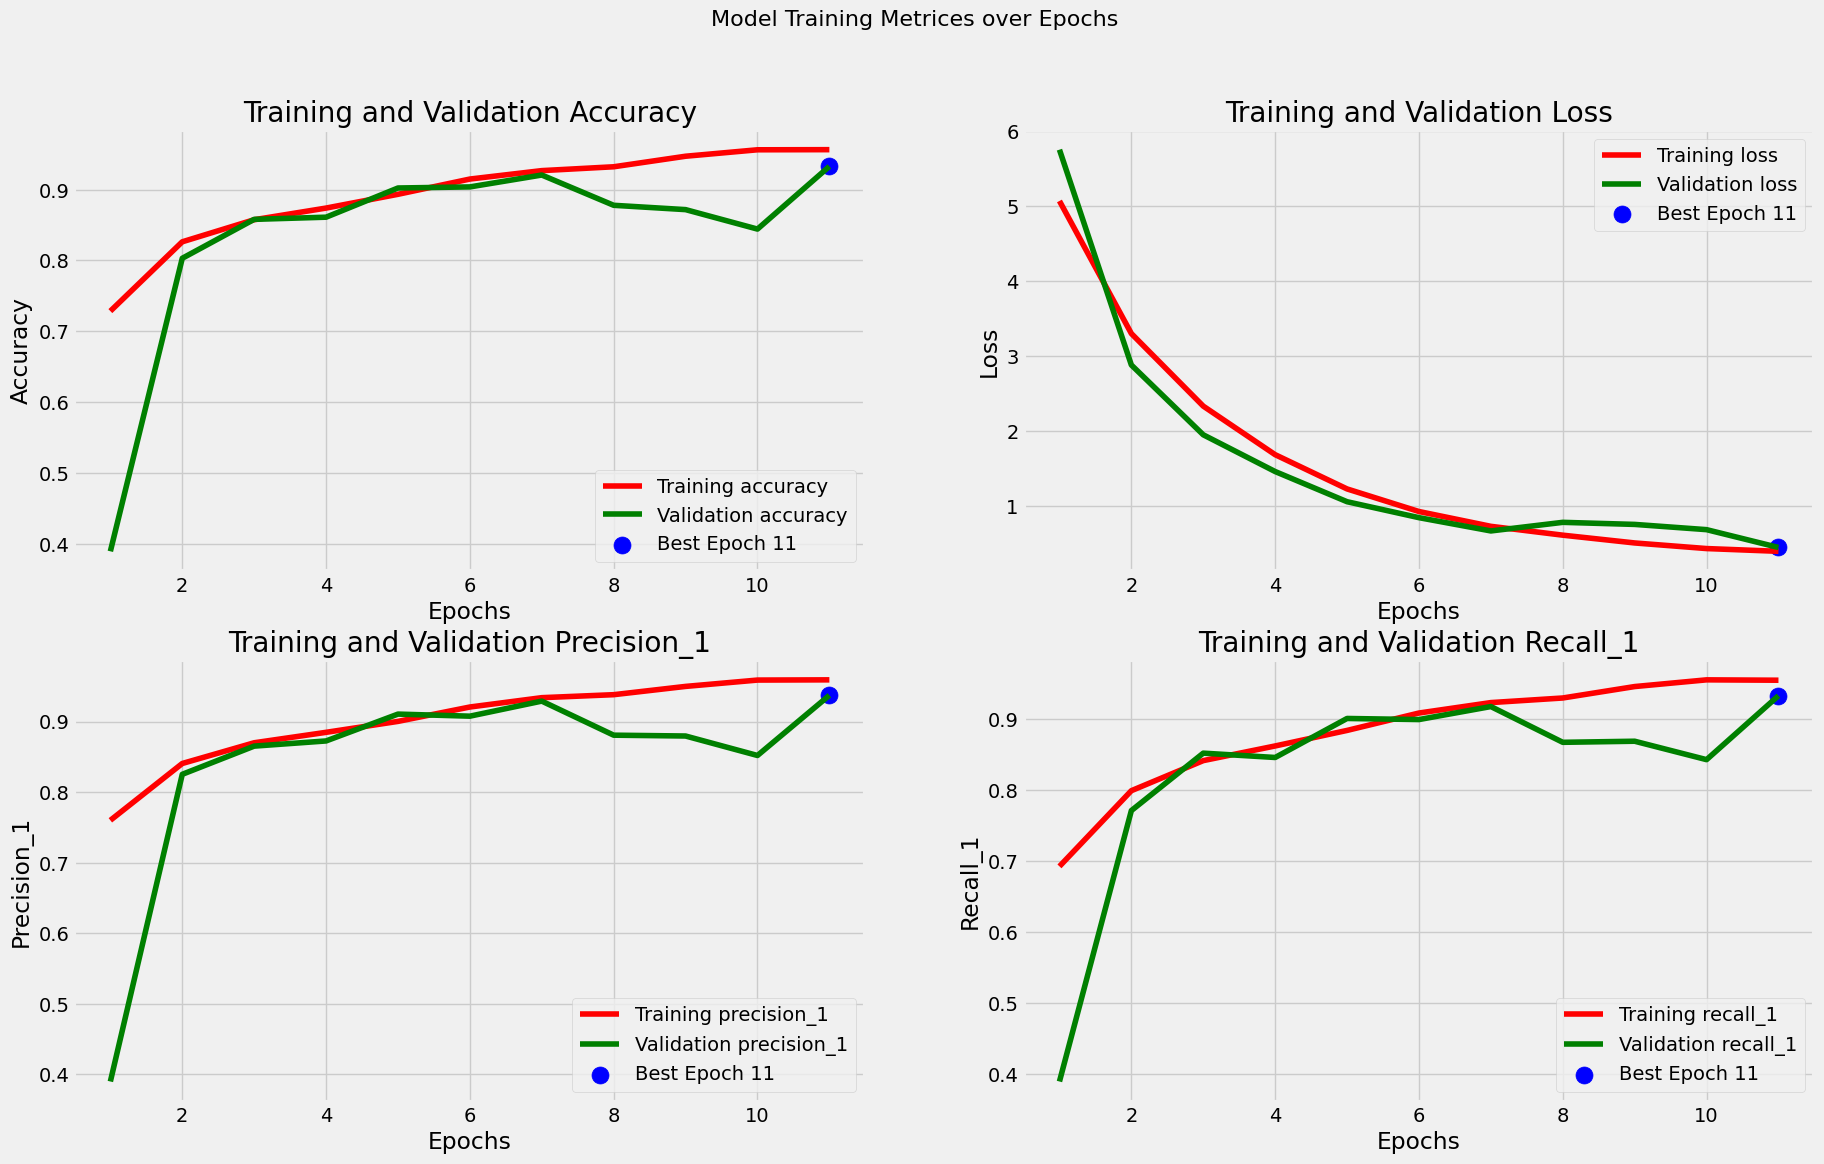

In [ ]:
metrics = ['accuracy' , 'loss' , 'precision_1' , 'recall_1']
tr_metrics = {m: history2.history[m] for m in metrics}
val_metrics = {m: history2.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss' :
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx+1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric]) +1 )

  plt.plot(epochs , tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs , val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150 , c = 'b',
             label = f'Best Epoch {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrices over Epochs', fontsize = 16)
plt.show()

In [ ]:
train_score = custom_cnn_model.evaluate(tr_gen , verbose = 1)
valid_score = custom_cnn_model.evaluate(valid_gen , verbose = 1)
test_score = custom_cnn_model.evaluate(ts_gen , verbose = 1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.9756 - loss: 0.3592 - precision_1: 0.9779 - recall_1: 0.9729
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9460 - loss: 0.4373 - precision_1: 0.9488 - recall_1: 0.9436
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 1.0000 - loss: 0.3255 - precision_1: 1.0000 - recall_1: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9359 - loss: 0.4427 - precision_1: 0.9376 - recall_1: 0.9305
Train Accuracy: 97.46%
Train Loss: 0.3582


Validation Accuracy: 93.89%
Validation Loss: 0.4461


Test Accuracy: 92.84%
Test Loss: 0.4659


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


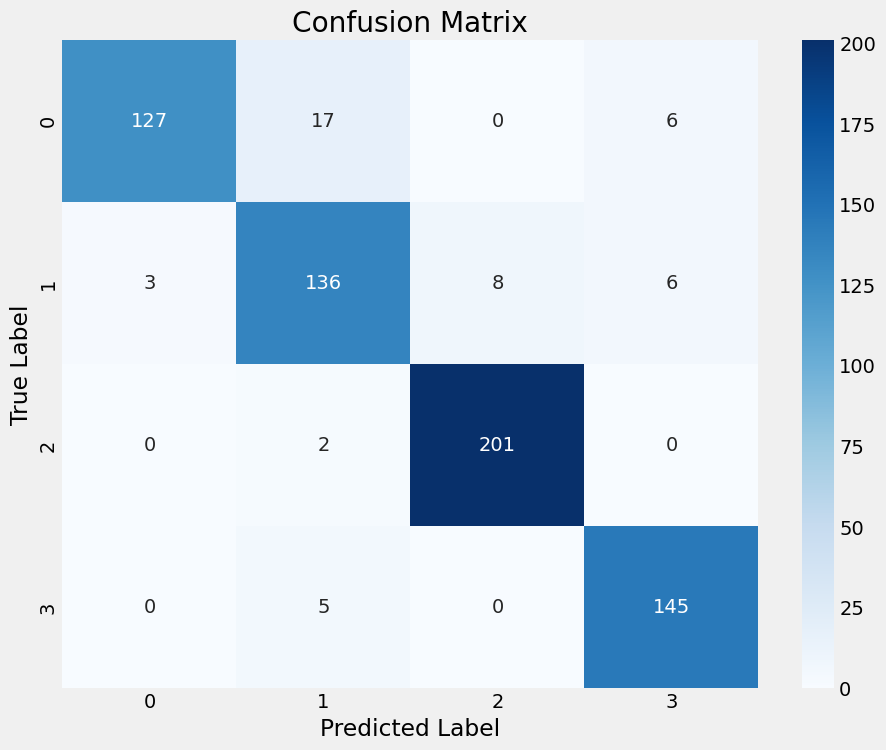

In [ ]:
preds = custom_cnn_model.predict(ts_gen)
y_pred = np.argmax(preds , axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituatary'
}

cm = confusion_matrix(ts_gen.classes , y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm , annot = True, fmt = 'd' , cmap = 'Blues', xticklabels = labels , yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
custom_cnn_model.save("custom_cnn_model.h5")

In [ ]:
#create a sequential model
cnn_model = Sequential()

#convolution layers
cnn_model.add(Conv2D(512, (3,3), padding = 'same' , input_shape = (224,224,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25)) #What is dropout and flattten and dense?
#What is maxpooling?

cnn_model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

#flatten the output for fully connected layers
cnn_model.add(Flatten())

#fully connected layers
cnn_model.add(Dense(256,activation = 'relu' , kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4,activation = 'softmax'))

cnn_model.compile(Adamax(learning_rate=0.001) , loss = 'categorical_crossentropy' , metrics =['accuracy', Precision(), Recall()])
cnn_model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen , epochs = 7 , validation_data = valid_gen)

Epoch 1/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 112s 296ms/step - accuracy: 0.5935 - loss: 2.1829 - precision_2: 0.7248 - recall_2: 0.4248 - val_accuracy: 0.7847 - val_loss: 0.8406 - val_precision_2: 0.8327 - val_recall_2: 0.6687
Epoch 2/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 290ms/step - accuracy: 0.8097 - loss: 0.6906 - precision_2: 0.8340 - recall_2: 0.7795 - val_accuracy: 0.8290 - val_loss: 0.5841 - val_precision_2: 0.8446 - val_recall_2: 0.8046
Epoch 3/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 289ms/step - accuracy: 0.8576 - loss: 0.5242 - precision_2: 0.8694 - recall_2: 0.8418 - val_accuracy: 0.8916 - val_loss: 0.4505 - val_precision_2: 0.9008 - val_recall_2: 0.8733
Epoch 4/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 292ms/step - accuracy: 0.8864 - loss: 0.4247 - precision_2: 0.8967 - recall_2: 0.8773 - val_accuracy: 0.8718 - val_loss: 0.4634 - val_precision_2: 0.8857 - val_recall_2: 0.8519
Epoch 5/7
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 291ms/step - accuracy: 0.9127 - loss: 0.3744 - precision_2: 0.9172 - rec

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_loss', 'val_precision_2', 'val_recall_2'])


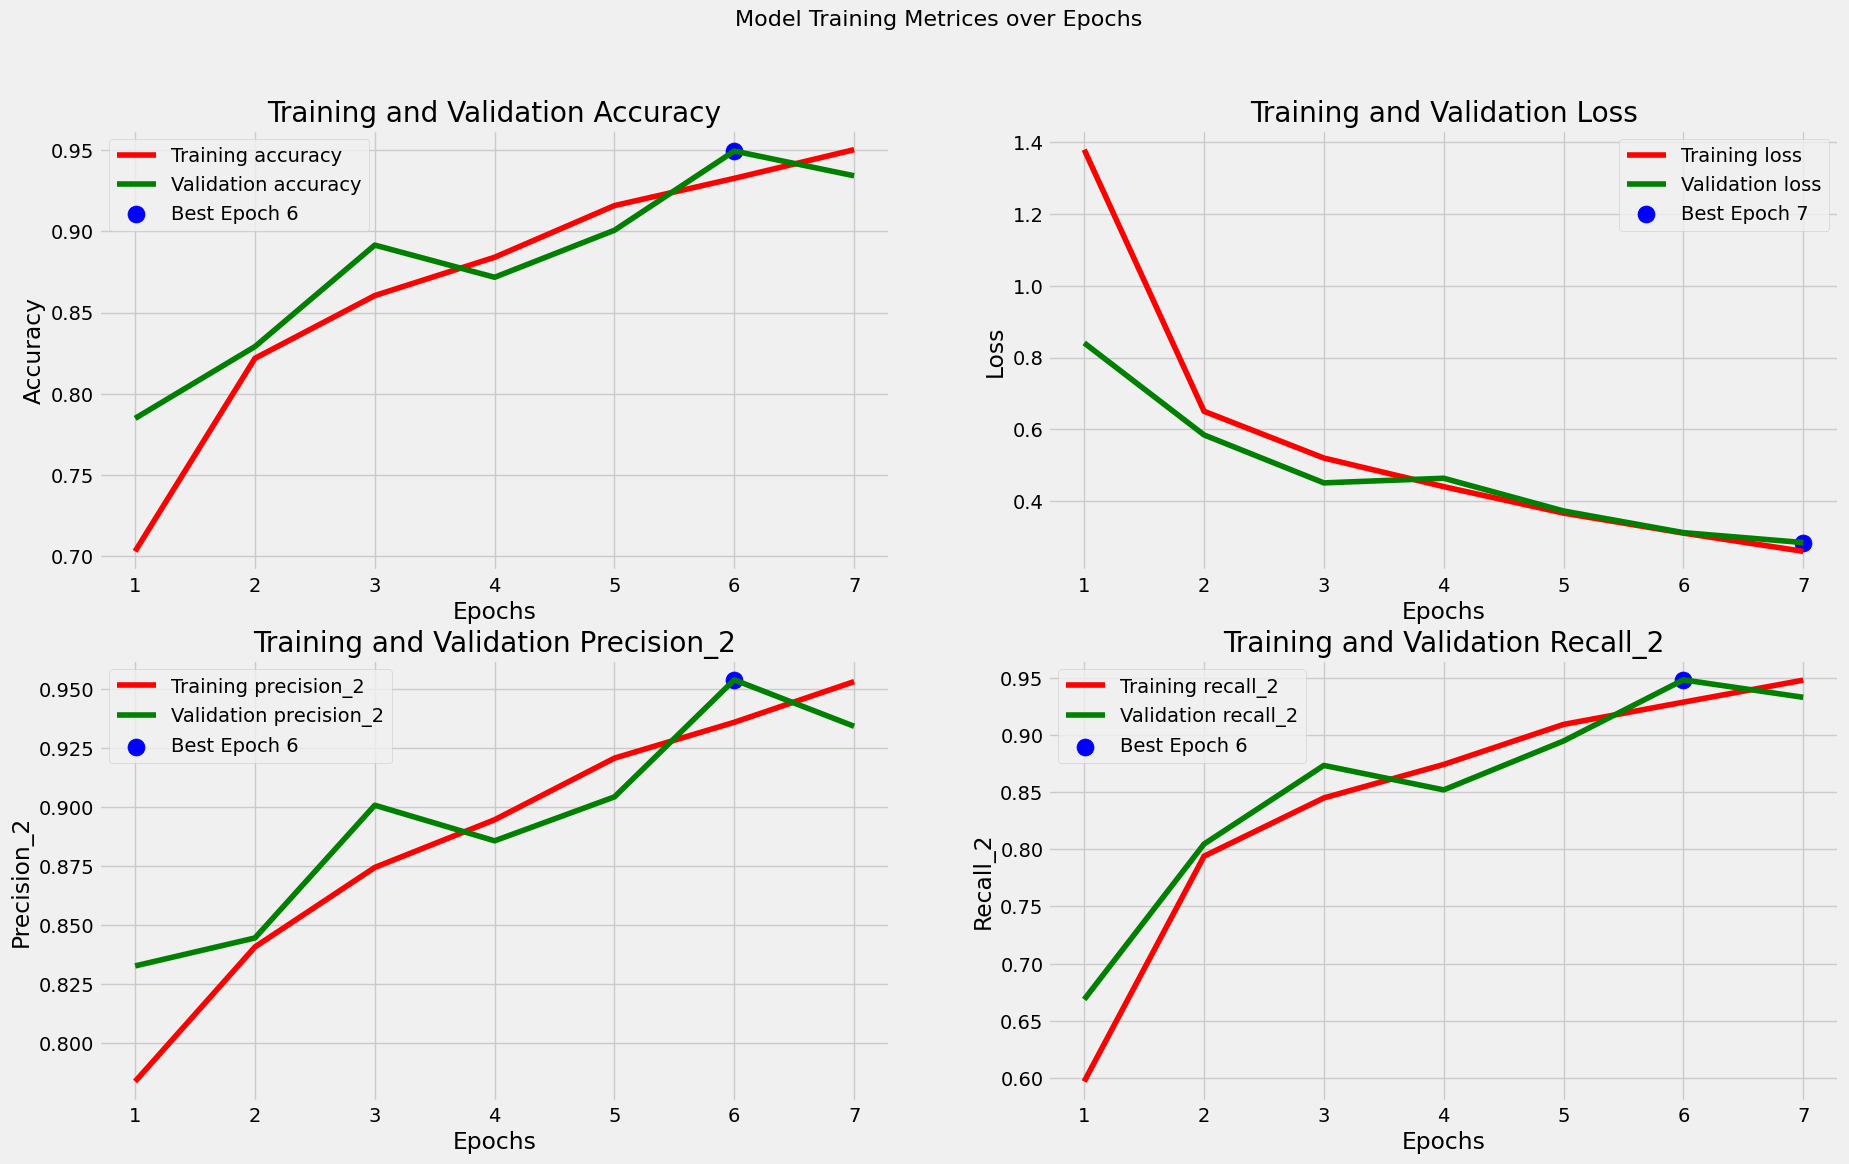

In [ ]:
metrics = ['accuracy', 'loss', 'precision_2', 'recall_2']
available_metrics = history.history.keys()

tr_metrics = {m: history.history[m] for m in metrics if m in available_metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics if f'val_{m}' in available_metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss' :
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx+1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric]) +1 )

  plt.plot(epochs , tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs , val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150 , c = 'b',
             label = f'Best Epoch {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrices over Epochs', fontsize = 16)
plt.show()



In [ ]:
train_score = cnn_model.evaluate(tr_gen , verbose = 1)
valid_score = cnn_model.evaluate(valid_gen , verbose = 1)
test_score = cnn_model.evaluate(ts_gen , verbose = 1)

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}%')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 32s 91ms/step - accuracy: 0.9782 - loss: 0.2013 - precision_2: 0.9793 - recall_2: 0.9768
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9424 - loss: 0.2735 - precision_2: 0.9458 - recall_2: 0.9388
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9519 - loss: 0.2705 - precision_2: 0.9541 - recall_2: 0.9497
Train Accuracy: 97.67%
Train Loss: 0.2025


Validation Accuracy: 94.35%
Validation Loss: 0.2812


Test Accuracy: 93.90%
Test Loss: 0.3102


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


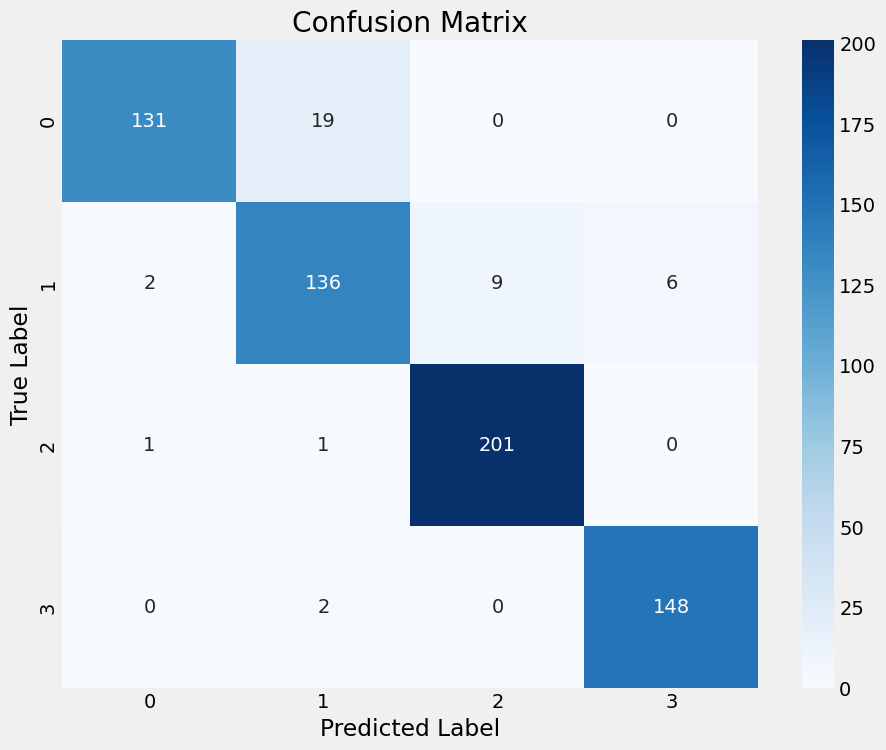

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds , axis = 1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituatary'
}

cm = confusion_matrix(ts_gen.classes , y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm , annot = True, fmt = 'd' , cmap = 'Blues', xticklabels = labels , yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes ,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       150
           1       0.86      0.89      0.87       153
           2       0.96      0.99      0.97       203
           3       0.96      0.99      0.97       150

    accuracy                           0.94       656
   macro avg       0.94      0.93      0.94       656
weighted avg       0.94      0.94      0.94       656



In [ ]:
cnn_model.save("cnn_model.h5")

In [ ]:
!pip install streamlit pyngrok python-dotenv

In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [ ]:
!pip install --upgrade h5py

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key = os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir , exist_ok=True)


def generate_explanation(img_path , model_prediction, confidence):

  prompt = f"""You are an expert neurologist tasked with interpreting a saliency map from a brain tumor MRI scan.
  The saliency map was generated by a deep learning model trained to classify brain tumors into one of the following categories: glioma, meningioma, pituitary, or no tumor.

  The model has predicted that this MRI scan is of class {model_prediction} with a confidence level of {confidence * 100}%.

  In your response:
  - Describe which areas of the brain the model focused on, referring specifically to the regions highlighted in light cyan.
  - Provide potential reasons for the model’s classification based on these regions.
  - Avoid phrases such as 'The saliency map highlights the regions the model is focusing on, which are in light cyan.'
  - Limit your explanation to a maximum of 4 sentences.
  - Think step by step for this and verify each step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img

def load_xception_model(model_path):
  img_shape = (299,299,3)

  base_model = tf.keras.applications.Xception(
      include_top = False,
      weights = 'imagenet',
      input_shape = img_shape,
      pooling = 'max'
  )

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate = 0.3),      # prevents over fitting
      Dense(128, activation = 'relu'),
      Dropout(rate = 0.25),
      Dense(4, activation = 'softmax')    #what is softmax and relu?
  ])

  model.build((None,)+img_shape)

  model.compile(Adamax(learning_rate= 0.001),      #What is adamax?
              loss = 'categorical_crossentropy',
              metrics = [
                  'accuracy',
                  Precision(),
                  Recall()
              ])
  model.load_weights(model_path)

  return model


st.title('Brain Tumor Classification')
st.write('Upload an MRI scan to classify')

uploaded_file = st.file_uploader("Choose an Image....." , type=["jpg","jpeg","png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception" , "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)


  labels = ['Glioma', 'Meningioma' , 'No Tumor' , 'Pituitary']
  img = image.load_img(uploaded_file, target_size = img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array , axis =0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f'Predicted Class: {result}')
  st.write('Predictions: ')
  for label,prob in zip (labels,prediction[0]):
    st.write(f"{label}: {prob*100:.2f}%")

  saliency_map = generate_saliency_map(model , img_array, class_index, img_size)

  col1,col2 = st.columns(2)
  with col1:
    st.image(uploaded_file,caption = "Uploaded Image" , use_container_width = True)
  with col2:
    st.image(saliency_map, caption = "Saliency Map" , use_container_width = True)


  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
     f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
          <div style="display: flex; justify-content: space-between; align-items: center;">
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #ff0000; margin: 0;">
                      {result}
                  </p>
              </div>
              <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                      {prediction[0][class_index]:.4%}
                  </p>
              </div>
          </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig. update_layout(
    title='Probabilities for each class',
    xaxis_title='Probability',
    yaxis_title='Class',
    height=400,
    width=600,
    yaxis=dict (autorange="reversed"))

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig. add_annotation(
      x=prob,
      y=1,
      text=f'{prob:.4f}',
      showarrow=False,
      xanchor='left',
      xshift=5)

  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)


Overwriting app.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
thread = Thread(target = run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr = '8501' , proto = 'http' , bind_tls = True)
print(f'Public URL: {public_url}')

Public URL: NgrokTunnel: "https://5608-34-168-202-58.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  ngrok.disconnect(tunnel.public_url)

Writing .env
